# Problem Statement

### The consumer finance company faces two critical risks in the loan approval process: potentially missing out on profitable business by rejecting creditworthy applicants and incurring financial losses by approving loans for applicants likely to default. The objective of this case study is to analyze data from past loan applicants to identify patterns and factors that indicate the likelihood of loan defaults. 

By employing exploratory data analysis (EDA), the company aims to determine key driver variables associated with default risk. This insight will enable informed decision-making regarding loan approvals, including the potential to deny, adjust the amount, or increase interest rates for risky applicants. Ultimately, effectively identifying these risky borrowers will help minimize credit losses and enhance the company’s overall risk management strategy.

#### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### load the csv and the data dictionary to understand and anaylyze the dataset

In [2]:
dataDict = pd.read_excel("Data_Dictionary.xlsx")

In [3]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [4]:
# display the content of data dictionary
dataDict

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
5,annual_inc_joint,The combined self-reported annual income provi...
6,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/...


##### From data dictionary its evident that we have been given with 116 columns in the data frame to analyze

#### We will now be loading the loan data file to start with the analysis

In [5]:
loanDataDf = pd.read_csv("Loan.csv")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
loanDataDf.shape

(39717, 111)

##### Appears that we have 39717 rows and 111 columns in loan data, we will now be pulling 10 rows to perform an initial analysis.

In [7]:
loanDataDf.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

##### Prima facia it appears that there are many columsn with NA values, lets try to pull those columns

In [8]:
loanDataDf.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


##### There are many columns here which have null values for almost or all data rows, we will need to cleanse these columns

In [9]:
# removing the columns for almots or all null values in the dta set.

In [10]:
loanDataDf.dropna(axis=1,how = 'all', inplace=True)

In [11]:
loanDataDf.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,NaN,NaN,9,0,7963,28.30%,12,f,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,NaN,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,NaN,NaN,7,0,17726,85.60%,11,f,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,NaN,NaN,4,0,8221,87.50%,4,f,0.00,0.00,3939.135294,3939

#### DataFrame is now reduced and null values are taken careof. Lets analyze more w.r.t columns

In [12]:
loanDataDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [13]:
loanDataDf.shape

(39717, 57)

In [14]:
loanDataDf.head(25)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.0000,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,NaN,NaN,9,0,7963,28.30%,12,f,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.0000,Jan-15,161.03,NaN,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,NaN,NaN,7,0,17726,85.60%,11,f,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.0000,May-16,1313.76,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,

In [15]:
loanDataDf.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,90.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,104.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,129.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


The dataframe is now reduced to 57 columns from 111

following numerical columns seems to have single value:
'collections_12_mths_ex_med','policy_code',acc_now_delinq,'chargeoff_within_12_mths','delinq_amnt','tax_liens'

We will be dropping them too

In [16]:
loanDataDf.drop(
    ['collections_12_mths_ex_med',
     'policy_code',
     'acc_now_delinq',
     'chargeoff_within_12_mths',
     'delinq_amnt',
     'tax_liens'],
    axis=1, inplace=True
)

In [17]:
loanDataDf.head(25)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,application_type,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-15,171.62,NaN,May-16,INDIVIDUAL,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,NaN,Sep-13,INDIVIDUAL,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-14,649.91,NaN,May-16,INDIVIDUAL,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,NaN,Apr-16,INDIVIDUAL,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.0000,May-16,67.79,Jun-16,May-16,INDIVIDUAL,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,NaN,NaN,9,0,7963,28.30%,12,f,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.0000,Jan-15,161.03,NaN,Jan-16,INDIVIDUAL,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,NaN,NaN,7,0,17726,85.60%,11,f,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.0000,May-16,1313.76,NaN,May-16,INDIVIDUAL,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,NaN,NaN,4,0,8221,87.50%,4,f,0.00,0.00,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.0000,Jan-15,111.34,NaN,Dec-14,INDIVIDUAL,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,NaN,4 years,OWN,40000.00,Sour

Some more columns desired to be cleaned-up

In [18]:
loanDataDf.pub_rec.values

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
loanDataDf.pymnt_plan.values

array(['n', 'n', 'n', ..., 'n', 'n', 'n'], dtype=object)

In [20]:
loanDataDf.initial_list_status.values

array(['f', 'f', 'f', ..., 'f', 'f', 'f'], dtype=object)

In [21]:
loanDataDf.application_type.values

array(['INDIVIDUAL', 'INDIVIDUAL', 'INDIVIDUAL', ..., 'INDIVIDUAL',
       'INDIVIDUAL', 'INDIVIDUAL'], dtype=object)

##### lets clean-up these columns as well

In [22]:
loanDataDf.drop(
    ['pub_rec',
     'pymnt_plan',
     'initial_list_status',
     'application_type'],
    axis=1, inplace=True
)

In [23]:
loanDataDf.shape

(39717, 47)

#### our data frame is now reduced to 47 columns

In [24]:
loanDataDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

#### lets also clean-up those columns which will not influence our analysis

memberid, url,desc, zip_code,addr_state,title,emp_title

In [25]:
loanDataDf.drop(
    ['member_id',
     'url',
     'desc',
     'zip_code',
    'addr_state',
    'title','emp_title'],
    axis=1, inplace=True
)

In [26]:
loanDataDf.shape

(39717, 40)

In [27]:
loanDataDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  object 
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

### few more columns which talk about post loan processing which may not be influencing the funders

[last_pymnt_d,last_pymnt_amnt,next_pymnt_d,recoveries,collection_recovery_fee,total_rec_int,total_rec_late_fee,
total_rec_prncp,total_pymnt_inv,total_pymnt,out_prncp,out_prncp_inv]

In [28]:
loanDataDf.drop(['last_pymnt_d',
 'last_pymnt_amnt'
 ,'next_pymnt_d'
 ,'recoveries'
 ,'collection_recovery_fee'
 ,'total_rec_int'
 ,'total_rec_late_fee'
 ,'total_rec_prncp'
 ,'total_pymnt_inv',
 'total_pymnt',
 'out_prncp',
 'out_prncp_inv'],axis =1, inplace = True)


In [29]:
loanDataDf.shape

(39717, 28)

In [30]:
loanDataDf.head(25)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,27.65,0,Jan-85,1,NaN,NaN,3,13648,83.70%,9,May-16,0.0
1,1077430,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,1.00,0,Apr-99,5,NaN,NaN,3,1687,9.40%,4,Sep-13,0.0
2,1077175,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,8.72,0,Nov-01,2,NaN,NaN,2,2956,98.50%,10,May-16,0.0
3,1076863,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,20.00,0,Feb-96,1,35.0,NaN,10,5598,21%,37,Apr-16,0.0
4,1075358,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.00,Source Verified,Dec-11,Current,other,17.94,0,Jan-96,0,38.0,NaN,15,27783,53.90%,38,May-16,0.0
5,1075269,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,11.20,0,Nov-04,3,NaN,NaN,9,7963,28.30%,12,Jan-16,0.0
6,1069639,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,8 years,RENT,47004.00,Not Verified,Dec-11,Fully Paid,debt_consolidation,23.51,0,Jul-05,1,NaN,NaN,7,17726,85.60%,11,May-16,0.0
7,1072053,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,9 years,RENT,48000.00,Source Verified,Dec-11,Fully Paid,car,5.35,0,Jan-07,2,NaN,NaN,4,8221,87.50%,4,Dec-14,0.0
8,1071795,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,4 years,OWN,40000.00,Source Verified,Dec-11,Charged Off,small_business,5.55,0,Apr-04,2,NaN,NaN,11,5210,32.60%,13,Aug-12,0.0
9,1071570,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,< 1 year,RENT,15000.00,Verified,Dec-11,Charged Off,other,18.08,0,Sep-04,0,NaN,NaN,2,9279,36.50%,3,Mar-13,0.0


In [31]:
loanDataDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      39717 non-null  int64  
 1   loan_amnt               39717 non-null  int64  
 2   funded_amnt             39717 non-null  int64  
 3   funded_amnt_inv         39717 non-null  float64
 4   term                    39717 non-null  object 
 5   int_rate                39717 non-null  object 
 6   installment             39717 non-null  float64
 7   grade                   39717 non-null  object 
 8   sub_grade               39717 non-null  object 
 9   emp_length              38642 non-null  object 
 10  home_ownership          39717 non-null  object 
 11  annual_inc              39717 non-null  float64
 12  verification_status     39717 non-null  object 
 13  issue_d                 39717 non-null  object 
 14  loan_status             39717 non-null

### Our dataframe is now much cleaner and reduced to 28 columns.
#### lets perform the null value analysis once more time and fix the inconsistencies

In [32]:
loanDataDf.isnull().sum()

id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq    25682
mths_since_last_record    36931
open_acc                      0
revol_bal                     0
revol_util                   50
total_acc                     0
last_credit_pull_d            2
pub_rec_bankruptcies        697
dtype: int64

## We have mths_since_last_delinq,mths_since_last_record columns with many null values. We can delete them safely.

In [33]:
loanDataDf.drop(['mths_since_last_delinq',
 'mths_since_last_record']
 ,axis =1, inplace = True)

### Lets analyze emp_length,revol_util,last_credit_pull_d,pub_rec_bankruptcies

In [34]:
loanDataDf['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [35]:
# lets get the most frequent value

loanDataDf['emp_length'].mode()

0    10+ years
dtype: object

In [36]:
nEmpLen = loanDataDf['emp_length'].mode()[0]
nEmpLen

'10+ years'

In [37]:
# lets update emp_length with the most common category
loanDataDf['emp_length'] = loanDataDf['emp_length'].fillna(nEmpLen)

In [38]:
# lets confirm 
loanDataDf[loanDataDf['emp_length'].isnull()]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies


In [39]:
# lets check pub_rec_bankruptcies
loanDataDf['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [40]:
# we can safely update NA with zero considering the above output
loanDataDf['pub_rec_bankruptcies'] = loanDataDf['pub_rec_bankruptcies'].fillna(0.0)


In [41]:
#lets check revol_util
loanDataDf['revol_util'].value_counts()

0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
0.10%      58
31.20%     57
61%        57
46.40%     57
66.60%     57
65.90%     56
70.40%     56
57.40%     55
49.80%     55
48.90%     55
25.50%     55
37.60%     55
64.80%     55
27.20%     54
89.50%     54
35.30%     54
46.60%     54
51.10%     54
32%        54
76.60%     54
68.60%     54
78.70%     54
75.50%     54
64.60%     54
51.60%     54
72.10%     53
62.80%     53
54.30%     53
45.60%     53
55.80%     53
48.20%     53
47.80%     53
68.70%     53
33.70%     53
70.80%     53
34.40%     53
41%        53
70.10%     52
66.90%     52
55.10%     52
53.90%     52
51.50%     52
48%        52
41.60%     52
29.10%     52
70.30%     52
55.50%     52
74.90%     52
36.50%     52
40.20%     51
58.70%     51
41.40%     51
49.10%     51
89.90%     51
43.40%     51
30.90%     51
54.10%     51
35.70%     51
45.90%     51
88%        51
66.10%     51
49.60%     51
54.60%     51
57.90%     50
52.30%     50
19.80%     50
57.20%

In [42]:
# we need to fix null values, safely with 0% and 
# there is a objecttype mismatch, we need to put it in float version
loanDataDf['revol_util'] = loanDataDf['revol_util'].fillna('0%')

In [43]:
loanDataDf['revol_util'] = loanDataDf['revol_util'].apply(lambda x : float(x.replace('%','')))

In [44]:
loanDataDf['revol_util'].describe()

count    39717.000000
mean        48.770677
std         28.367689
min          0.000000
25%         25.300000
50%         49.200000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

In [45]:
#let's analyze last_credit_pull_d
loanDataDf[loanDataDf['last_credit_pull_d']. isnull()]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies
26025,575712,5000,5000,5000.0,36 months,11.12%,163.98,B,B3,5 years,RENT,96000.0,Not Verified,Sep-10,Charged Off,small_business,4.04,0,Oct-97,0,4,7172,80.6,9,NaN,0.0
39476,186499,1000,1000,875.0,36 months,7.12%,30.94,A,A1,< 1 year,MORTGAGE,120000.0,Not Verified,Dec-07,Fully Paid,other,0.65,0,Jul-97,1,7,2227,3.8,37,NaN,0.0


In [46]:
# these are just 2 records we can safely ignore/delete them
loanDataDf = loanDataDf[~loanDataDf['last_credit_pull_d']. isnull()]

## we have fixed all inconsistencies, lets take a look at the final dataframe

In [47]:
loanDataDf.isnull().sum()

id                      0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
revol_bal               0
revol_util              0
total_acc               0
last_credit_pull_d      0
pub_rec_bankruptcies    0
dtype: int64

In [48]:
loanDataDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39715 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39715 non-null  int64  
 1   loan_amnt             39715 non-null  int64  
 2   funded_amnt           39715 non-null  int64  
 3   funded_amnt_inv       39715 non-null  float64
 4   term                  39715 non-null  object 
 5   int_rate              39715 non-null  object 
 6   installment           39715 non-null  float64
 7   grade                 39715 non-null  object 
 8   sub_grade             39715 non-null  object 
 9   emp_length            39715 non-null  object 
 10  home_ownership        39715 non-null  object 
 11  annual_inc            39715 non-null  float64
 12  verification_status   39715 non-null  object 
 13  issue_d               39715 non-null  object 
 14  loan_status           39715 non-null  object 
 15  purpose            

## fix the object type of the columns
## term,int_rate,emp_length

In [49]:
loanDataDf['term'].value_counts()

 36 months    29094
 60 months    10621
Name: term, dtype: int64

In [50]:
loanDataDf['term'] = loanDataDf['term'].apply(lambda x : int(x.replace('months','')))

In [51]:
loanDataDf['int_rate'].value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
7.49%     656
11.71%    607
9.99%     603
7.90%     582
5.42%     573
11.99%    532
12.69%    491
10.37%    468
6.03%     447
12.99%    446
8.49%     445
12.42%    442
10.65%    435
5.79%     410
8.90%     402
7.29%     397
6.62%     396
11.86%    391
14.27%    390
10.59%    380
9.63%     378
9.91%     377
5.99%     347
7.14%     341
6.99%     336
11.11%    331
12.53%    327
16.77%    327
10.74%    312
6.54%     305
6.91%     303
8.94%     294
7.66%     292
13.61%    291
15.99%    286
13.98%    284
13.23%    263
11.12%    258
13.99%    257
6.17%     252
10.00%    251
12.68%    251
10.75%    250
10.36%    250
11.36%    247
16.49%    241
11.83%    233
18.25%    230
10.62%    228
14.65%    222
13.06%    220
10.38%    219
10.25%    218
15.23%    215
14.96%    214
16.89%    209
15.65%    208
11.14%    206
6.92%     204
12.18%    203
17.27%    203
15.27%    200
15.95%    199
16.32%    198
14.79%    192
8.00%     191
17.49%

In [52]:
loanDataDf['int_rate'] = loanDataDf['int_rate'].apply(lambda x : float(x.replace('%','')))

In [53]:
loanDataDf['emp_length'].value_counts()

10+ years    9954
< 1 year     4582
2 years      4388
3 years      4095
4 years      3436
5 years      3281
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [54]:

def convert_emp_length(emp_length):
    if '10+' in emp_length:
        return 10  # or any value you prefer for "10+ years"
    elif '< 1' in emp_length:
        return 0  # assuming "< 1 year" means 0 years
    else:
        return int(emp_length.split()[0])  # Get the numeric part

# Apply the conversion
loanDataDf['emp_length'] = loanDataDf['emp_length'].apply(convert_emp_length)

In [55]:
loanDataDf['emp_length'].value_counts()

10    9954
0     4582
2     4388
3     4095
4     3436
5     3281
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

In [56]:
loanDataDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39715 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39715 non-null  int64  
 1   loan_amnt             39715 non-null  int64  
 2   funded_amnt           39715 non-null  int64  
 3   funded_amnt_inv       39715 non-null  float64
 4   term                  39715 non-null  int64  
 5   int_rate              39715 non-null  float64
 6   installment           39715 non-null  float64
 7   grade                 39715 non-null  object 
 8   sub_grade             39715 non-null  object 
 9   emp_length            39715 non-null  int64  
 10  home_ownership        39715 non-null  object 
 11  annual_inc            39715 non-null  float64
 12  verification_status   39715 non-null  object 
 13  issue_d               39715 non-null  object 
 14  loan_status           39715 non-null  object 
 15  purpose            

## Lets create the buckets of numerical and categorical columns

#### num_column = [term,loan_amnt,int_rate,emp_length,annual_inc,revol_bal,revol_util,dti]
#### cat_column = [grade, home_owneship,verification_status,loan_status,purpose]


In [57]:
num_column = ['loan_amnt','int_rate','emp_length','annual_inc']
cat_column = ['grade', 'home_ownership','verification_status','loan_status','purpose']

## Lets perform a univariate analysis for each numerical column

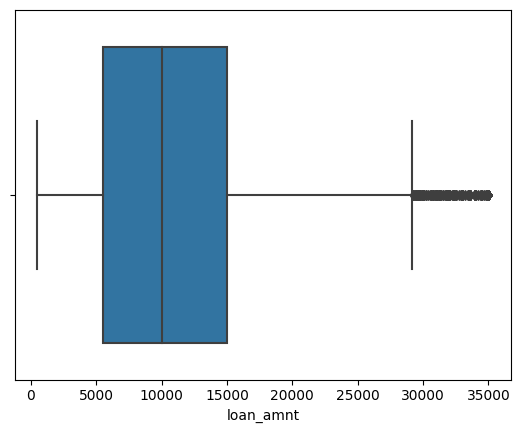

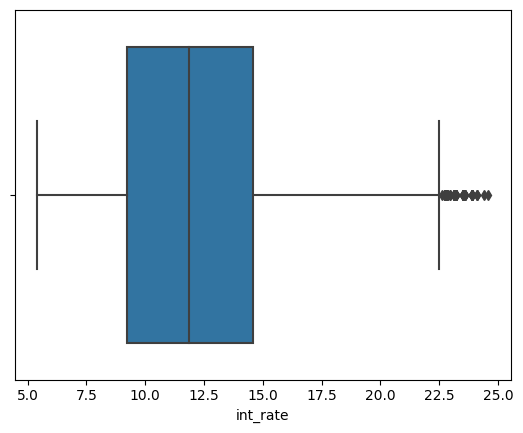

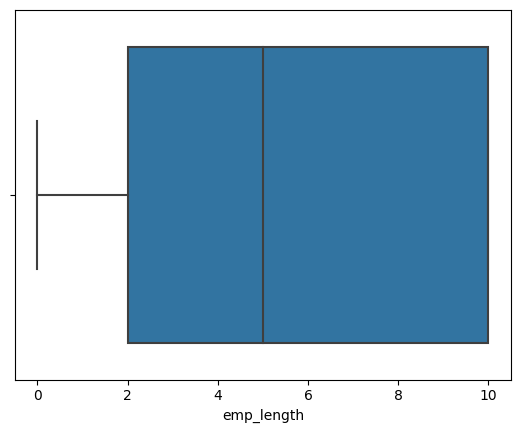

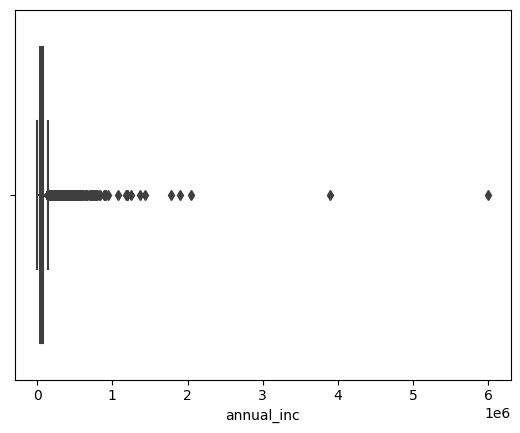

In [58]:
for columns in num_column:
    sns.boxplot(x=loanDataDf[columns])
    plt.show()

## From the above charts, its clear that of all the numerical columns, we had bucketized; annual_inc has many ouliers. Need to understand the trend more carefully and as required we will treat the outliers.

### lets analyze the outliers per IQR

In [59]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = loanDataDf['annual_inc'].quantile(0.25)
Q3 = loanDataDf['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
len(loanDataDf[(loanDataDf['annual_inc'] < lower_bound) | (loanDataDf['annual_inc'] > upper_bound)])

1843

In [60]:
# lets remove these outliers
loanDataDf = loanDataDf[(loanDataDf['annual_inc'] >= lower_bound) & (loanDataDf['annual_inc'] <= upper_bound)]

<AxesSubplot:>

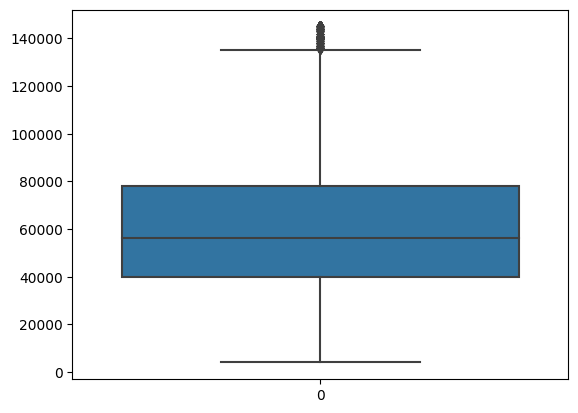

In [61]:
sns.boxplot(loanDataDf['annual_inc'])

## The annual income plot looks much better now.

## Visualizing Categorical Data

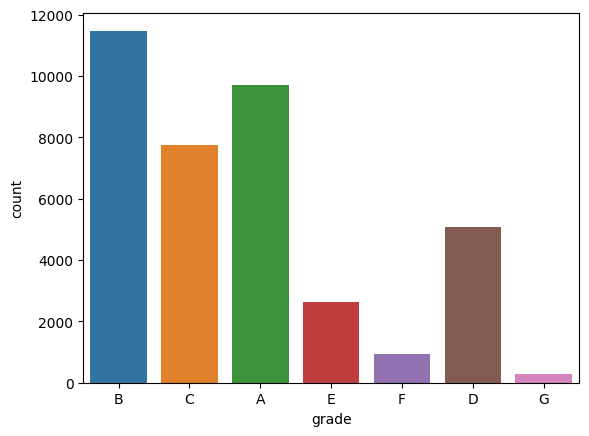

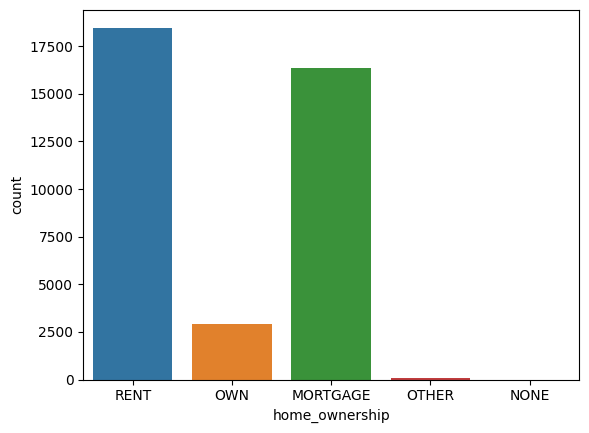

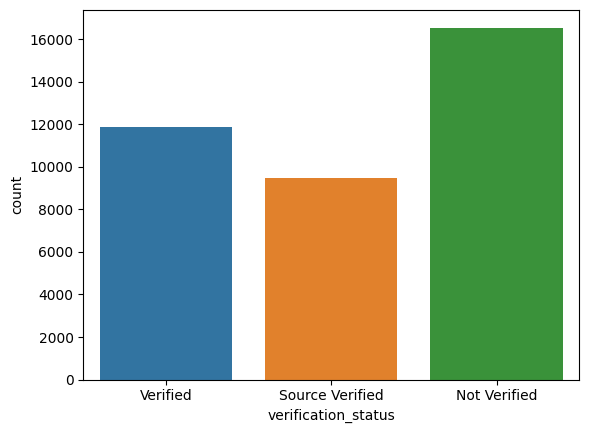

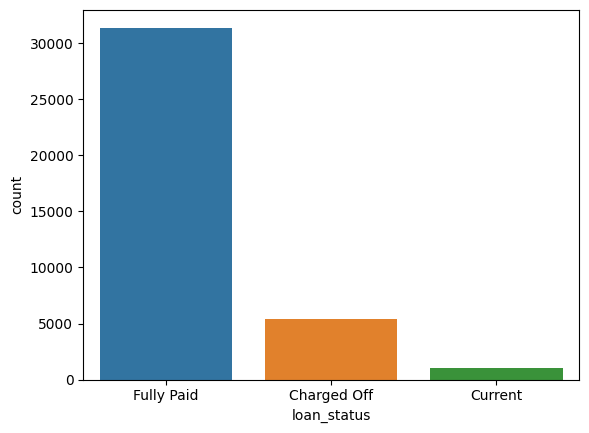

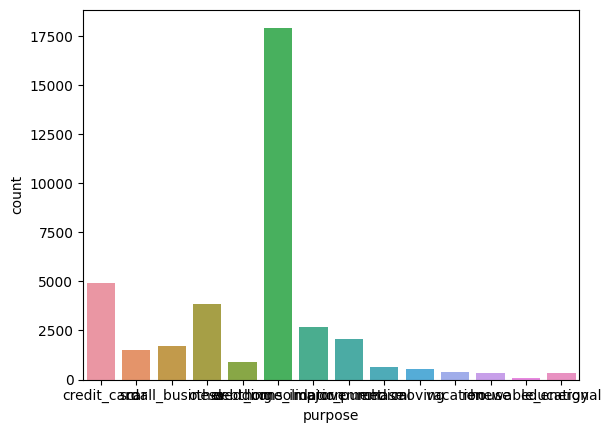

In [62]:
for columns in cat_column:
    sns.countplot(x=loanDataDf[columns])
    plt.show()

### From the above charts for categorical columns, following is the analysis:

#### 1 - Grade B has highest number of loans issued, followed by Grade A, C, D, E,F,G
#### 2 - House-ownership as Rent has highest number of loans associated and House-ownership as Own has least number of loan associated.
#### 3 - Significant number of loans which are not verified.
#### 4 - Most of the loans have been fully-paid

In [63]:
#### for the plot as defined for purpose lets adjust the figure for better readability

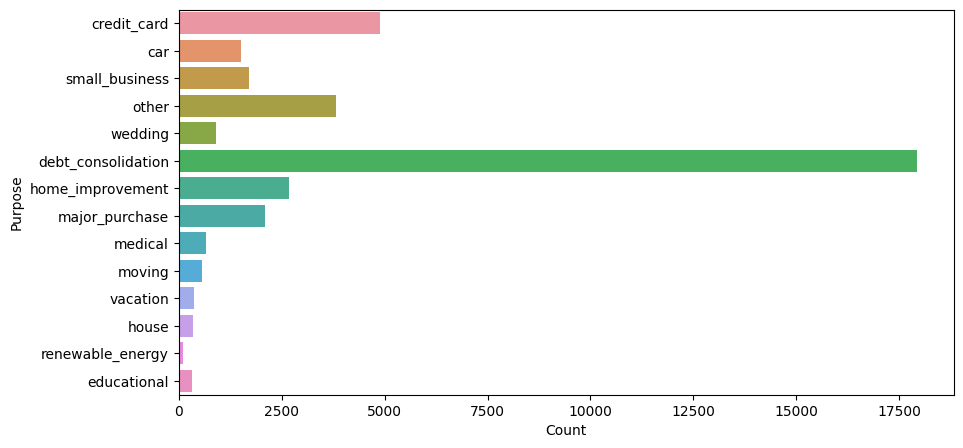

In [64]:
plt.figure(figsize=(10,5))
sns.countplot(y=loanDataDf['purpose'])
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.show()

### Debt consolidation stands out as the leading purpose for the loans

## Bi-Variate Analysis

## lets analyze loan status and annual income

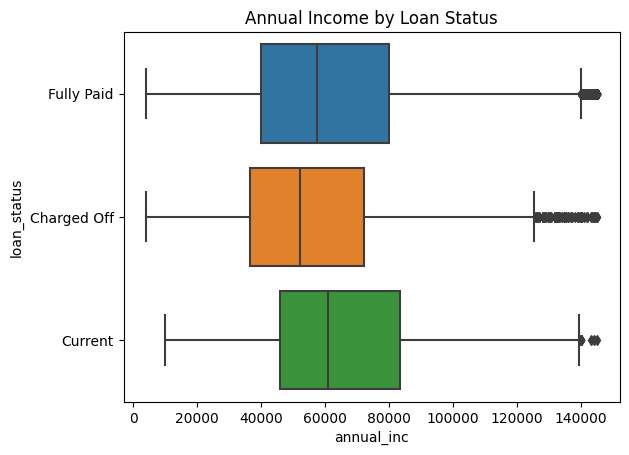

In [65]:

sns.boxplot(x='annual_inc', y='loan_status', data=loanDataDf)
plt.title('Annual Income by Loan Status')
plt.show()

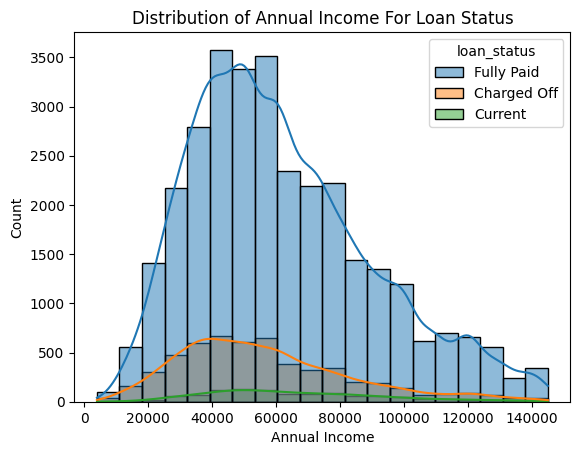

In [66]:
# Distribution of annual_inc based on loan_status
sns.histplot(data=loanDataDf,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status',fontsize=12)
plt.show()

Interpreting the Trends:
Borrowers with lesser income are likely default more than the ones with higher income

### Analyze term, loan amount and loan status

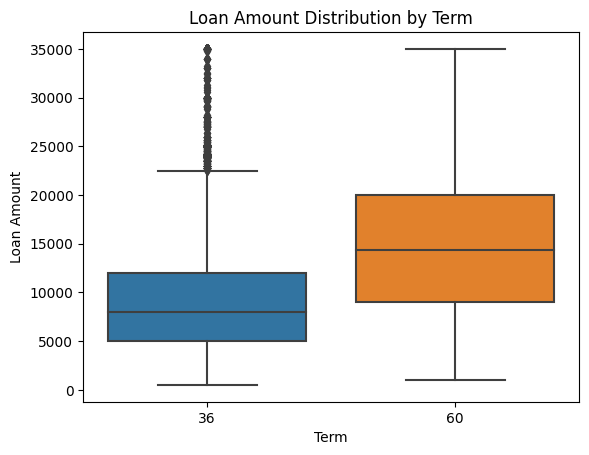

In [67]:
### Analyze term and loan amount

sns.boxplot(data=loanDataDf, x='term', y='loan_amnt')
plt.title('Loan Amount Distribution by Term')
plt.ylabel('Loan Amount')
plt.xlabel('Term')
plt.show()

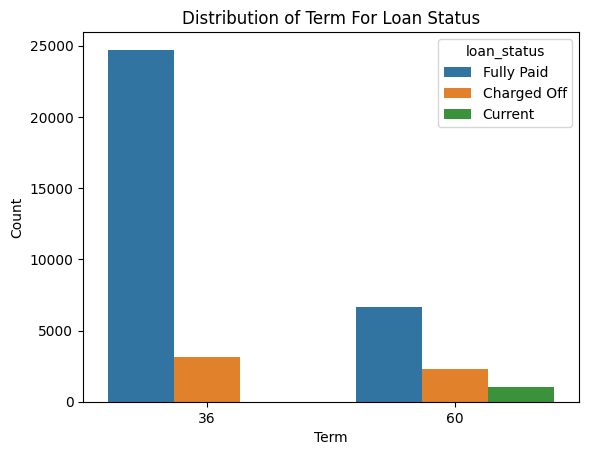

In [68]:
# Distribution of Term based on Loan Status
sns.countplot(data=loanDataDf,x='term',hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Loan Status')
plt.show()

### Inference: The 60 month term is more likely to get defaulted than 36 month term.

## lets analyze Employment Length and Loan Status

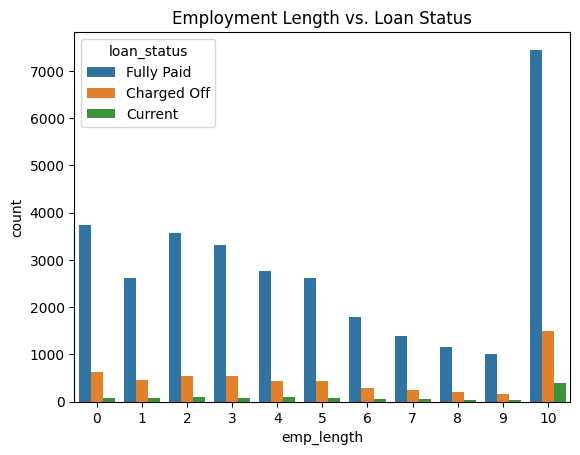

In [69]:

sns.countplot(x='emp_length', hue='loan_status', data=loanDataDf)
plt.title('Employment Length vs. Loan Status')
plt.show()

#### In each employment length bucket, count of fullt paid loans is higher. Maximum number of fully paid loans are associated with 10+ years of emplyment.

## lets analyze Grade and Loan Status

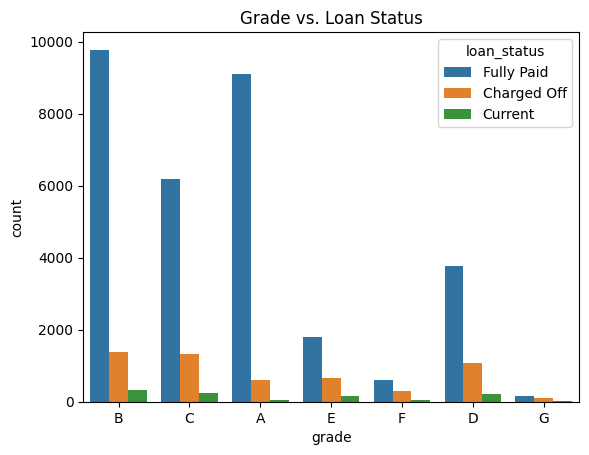

In [70]:

sns.countplot(x='grade', hue='loan_status', data=loanDataDf)
plt.title('Grade vs. Loan Status')
plt.show()

#### Loan Grade and Loan Status: The chart shows a clear relationship between loan grade and loan status. Lower-grade loans (E, F, G) are more likely to be "Charged Off," while higher-grade loans (A, B, C) are more likely to be "Fully Paid."

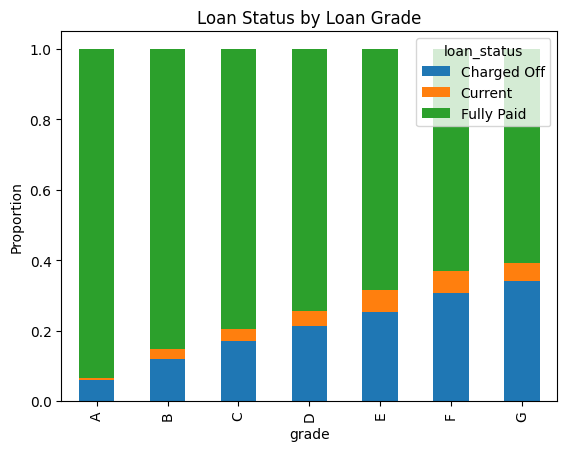

In [71]:
loanStatusbyGrade = loanDataDf.groupby('grade')['loan_status'].value_counts(normalize=True).unstack()
loanStatusbyGrade.plot(kind='bar', stacked=True)
plt.title('Loan Status by Loan Grade')
plt.ylabel('Proportion')
plt.show()

#### Inference :
Grade A and B: Grade A and B have the highest proportions of "Fully Paid" loans and the lowest proportions of "Charged Off" loans.
Grade G: Grade G has the highest proportion of "Charged Off" loans and the lowest proportion of "Fully Paid" loans.

### Loan Status and Loan Amount

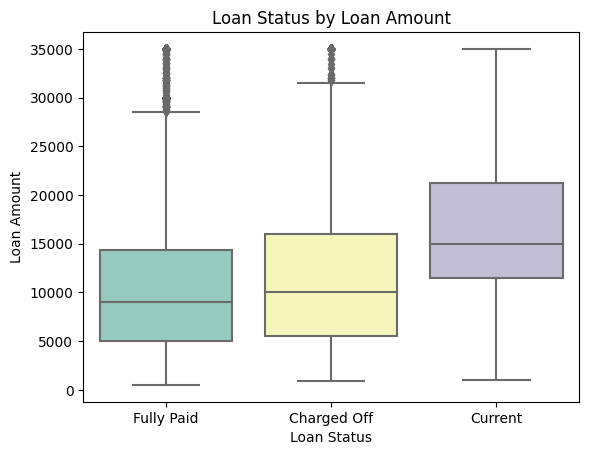

In [72]:
sns.boxplot(x='loan_status', y='loan_amnt', data=loanDataDf, palette='Set3')
plt.title('Loan Status by Loan Amount')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

### Inference : No clear relationship identified w.r.t loan amount and loan status. 

## lets analyze Intrest Rate and Term

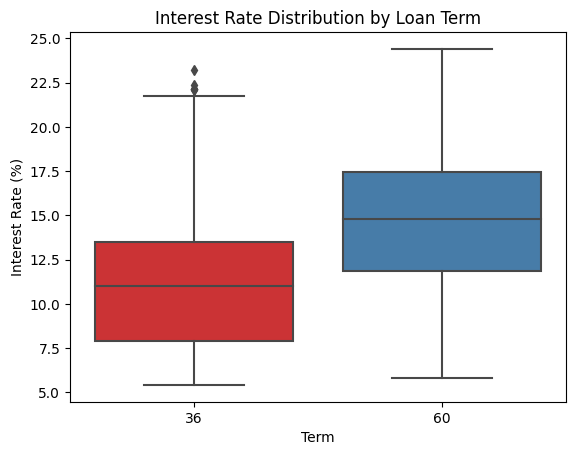

In [73]:
sns.boxplot(x='term', y='int_rate', data=loanDataDf, palette='Set1')
plt.title('Interest Rate Distribution by Loan Term')
plt.xlabel('Term')
plt.ylabel('Interest Rate (%)')
plt.show()

## lets analyze Intrest Rate and Loan Status

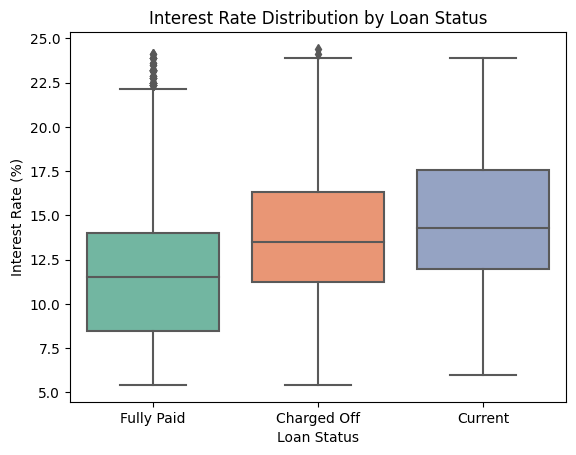

In [74]:
sns.boxplot(x='loan_status', y='int_rate', data=loanDataDf, palette='Set2')
plt.title('Interest Rate Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate (%)')
plt.show()

Median intrest of charged off loans is higher than fully paid loans.
For the current ongoing loans the median intrest appears to be on higher side too.

## lets analyze Intrest Rate and Grade

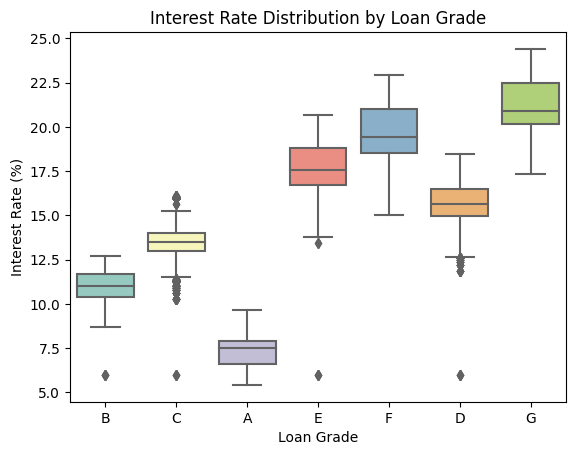

In [75]:

sns.boxplot(x='grade', y='int_rate', data=loanDataDf, palette='Set3')
plt.title('Interest Rate Distribution by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate (%)')

plt.show()

### Inference : Grade A has likely to pay lesser intrest  than Grade B and C. Grades D,E,F,G have been charged with higher intrest rates. Particularly grades E,F,G.

### It can be safer to assume that loans from Grade A and B are more stable compared to other grades.

##### We need to analyze more deep w.r.t to these grades and other loan influencing parameters.

### Creating a Pivot Table to understand the impact of influencer parameters.

In [76]:
pivot_table = pd.pivot_table(
    loanDataDf,
    values=['id', 'loan_amnt', 'int_rate','dti', 'annual_inc', 'revol_util','inq_last_6mths','delinq_2yrs'],
    index='grade',
    aggfunc={
        'id': 'count',
        'loan_amnt': 'mean',
        'int_rate':'mean',
        'dti': 'mean',
        'annual_inc': 'mean',
        'revol_util': 'mean',
        'inq_last_6mths' :'mean',
        'delinq_2yrs':'mean'
    }
).rename(columns={'id': 'count_ids'})

In [77]:
pivot_table

,annual_inc,delinq_2yrs,dti,count_ids,inq_last_6mths,int_rate,loan_amnt,revol_util
grade,,,,,,,,
A,60796.423623,0.044842,12.219229,9723,0.671706,7.332462,8460.094621,29.860984
B,60467.839343,0.115797,13.624696,11477,0.784526,11.018520,10793.659057,46.521392
C,59837.370308,0.186589,14.053158,7755,1.076209,13.551110,10690.486783,56.430054
D,61349.977387,0.242299,14.098553,5064,0.982820,15.714376,11942.471367,62.909220
E,66380.925160,0.235899,14.318758,2624,0.964177,17.677309,15227.286585,67.544043
F,71629.674230,0.325949,14.384283,948,1.042194,19.714399,17548.734177,69.986498
G,77642.439537,0.437722,13.960071,281,0.978648,21.334306,19723.487544,75.176157


### In the above Pivot Table, there is a pattern being observed which indicated below:
#### 1 - revol_util and dti have an influence on intrest rate.
#### 2 - Avg delinq_2yrs and inq_last_6mths influence dti and revol_util

Lenders use this information to evaluate a borrower's likelihood of defaulting on future loans, which influences lending decisions and terms.

In [78]:
# identify the trend for charged_off loans

# Filter based on loan_status
chargedOffDF = loanDataDf[loanDataDf['loan_status'] == 'Charged Off']

# Create the pivot table
pivot_table = pd.pivot_table(
    chargedOffDF,
    values=['id', 'loan_amnt', 'int_rate','dti', 'annual_inc', 'revol_util','inq_last_6mths','delinq_2yrs','term'],
    index='grade',
    aggfunc={
        'id': 'count',
        'loan_amnt': 'mean',
        'int_rate':'mean',
        'dti': 'mean',
        'annual_inc': 'mean',
        'revol_util': 'mean',
        'inq_last_6mths' :'mean',
        'delinq_2yrs':'mean',
        'term':'mean',
    }
).rename(columns={'id': 'count_ids', 'term':'Avg loan_term'})

In [79]:
pivot_table

,annual_inc,delinq_2yrs,dti,count_ids,inq_last_6mths,int_rate,loan_amnt,revol_util,Avg loan_term
grade,,,,,,,,,
A,50612.631315,0.067454,13.423828,593,0.856661,7.588870,7729.426644,36.454030,37.497470
B,54010.114634,0.108049,13.967288,1379,0.934735,11.127273,10690.427846,46.750595,43.483684
C,55280.132994,0.165158,14.471418,1326,1.228507,13.603303,10958.484163,55.866327,44.959276
D,57774.742068,0.207756,14.037258,1083,1.141274,15.842512,12049.492151,61.436639,47.590028
E,61637.358958,0.206949,14.410408,662,0.996979,17.843323,15383.874622,68.773157,54.271903
F,67835.764227,0.353952,14.202371,291,1.082474,20.017766,18582.646048,71.584880,56.206186
G,69404.194062,0.437500,13.558437,96,1.062500,21.449167,18322.395833,69.489583,55.250000


### Inference - For the charged-off loans we observed the same pattern.

In [82]:
correlation_matrix = pivot_table[['dti','int_rate','revol_util','annual_inc','inq_last_6mths','delinq_2yrs','loan_amnt']].corr()

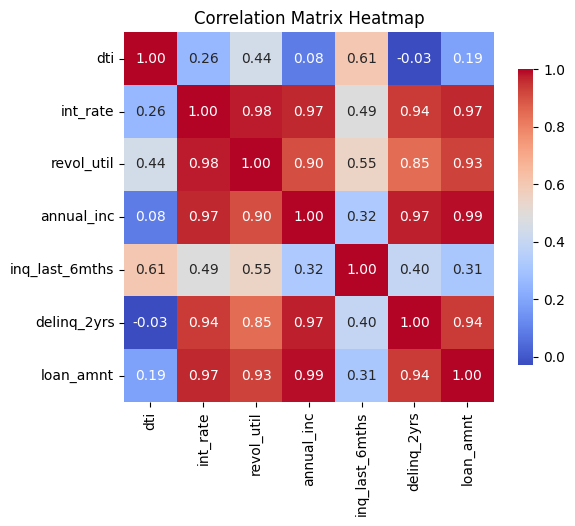

In [83]:
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix Heatmap')
plt.show()



#### Data Preparation
- **Data Loading**: The dataset, comprising 39717 rows and initially 111 columns, was loaded from a CSV file.
- **Missing Values**: A comprehensive check for null values revealed several columns with excessive missing data, leading to a reduction in the dataset to 47 columns after cleaning.
- **Data Cleansing**: Columns with single values and those not relevant to the analysis (e.g., post-loan processing details) were removed. Null values in critical columns were addressed by filling with the most frequent or appropriate values.

#### Exploratory Data Analysis (EDA)
- **Numerical Analysis**: Boxplots revealed outliers in annual income. An IQR method was employed to identify and remove these outliers, leading to a clearer distribution.
- **Categorical Analysis**: Count plots illustrated trends in loan grades, home ownership, verification status, and loan status. Key findings include:
  - Grade B had the highest loan issuance.
  - Renters comprised the majority of loan recipients.
  - A significant portion of loans were not verified.

#### Bi-Variate Analysis
- **Annual Income vs. Loan Status**: Analysis showed borrowers with lower incomes were more likely to default.
- **Term and Loan Amount**: The analysis indicated that loans with a 60-month term had higher default rates compared to 36-month loans.
- **Employment Length**: Loans were most frequently fully paid by those with over 10 years of employment as well as defaulted.
- **Interest Rate Analysis**: Higher interest rates correlated with higher default rates, especially for lower-grade loans (D, E, F, G).

#### Pivot Table Insights
A pivot table was created to understand the relationship between various factors like DTI, interest rate, and annual income across different loan grades. Key observations included:
- **Correlation Analysis**: The correlation matrix showed that DTI and revolving utilization have significant impacts on interest rates and are influenced by the number of inquiries and delinquencies.

- - Strong Positive Correlations:
int_rate and revol_util: Borrowers with higher revolving utilization tend to have higher interest rates.
int_rate and annual_inc: Borrowers with higher annual incomes might be offered lower interest rates.
loan_amnt and annual_inc: Borrowers with higher incomes tend to borrow larger amounts.
- - Strong Negative Correlations:
dti and loan_amnt: Borrowers with higher DTIs might be less likely to borrow large amounts.
inq_last_6mths and loan_amnt: Borrowers with more recent inquiries might be less likely to be approved for large loans.

#### Charged-Off Loans
A focused analysis on charged-off loans revealed similar trends as those identified in the overall dataset, confirming the influence of factors like loan grade and DTI on the likelihood of defaults.

### Conclusion
By focusing on key factors such as income, loan term, and borrower credit history, the company can better predict defaults and tailor loan offers to minimize risk.

